In [1]:
import warnings                                   # 경고 메시지를 출력하지 않게 하기위해 import 한다.
warnings.filterwarnings('ignore')                 # 경고 메시지를 출력하지 않게 한다.
import numpy as np                                # 수치 계산, 배열 처리를 위해 import 한다.
import pandas as pd                               # 데이터 분석을 위한 전처리를 위해 import 한다.
import matplotlib as mpl                          # matplotlib에서 음수 데이터의 '-' 부호가 깨지는 것을 방지하기 위해 import 한다.
mpl.rcParams['axes.unicode_minus'] = False        # matplotlib에서 음수 데이터의 '-' 부호가 깨지는 것을 방지한다.
import matplotlib.pyplot as plt                   # 시각화를 하기 위해 import 한다.
plt.rcParams['font.family'] = 'NanumGothicCoding' # matplotlib에서 사용할 글꼴을 지정한다.
plt.rcParams['font.size'] = 15                    # matplotlib에서 사용할 글꼴 크기를 저정한다.
import seaborn as sns                             # 시각화를 하기 위해 import 한다. matplotlib 기반으로 만든 시각화 도구
from plotnine import *                            # R의 ggplot2 패키지를 사용하는 것 처럼 사용하는 시각화 도구를 import 한다.
import missingno as msno                          # 누락값의 분포를 그래프 형태로 보기위해 import 한다.
import folium                                     # 지도 시각화를 하기 위해 import 한다.
# 쥬피터 노트북에서 그래프를 출력할 수 있게 한다.
# %matplotlib inline
# 쥬피터 노트북에서 그래프를 출력하고 변형을 할 수 있게 한다.
# %matplotlib notebook

서울시 4급 부서장 이상의 간부직 공무원의 업무 추진비 내역을 활용하여 업무 추진비 사용 목적과 업무 추진비를 사용한 장소를 분석한다.  
https://opengov.seoul.go.kr/expense/list

In [2]:
df = pd.read_csv('./data/raw.csv')
print(df.shape)
df.head()

(51456, 10)


,1소속부서,결제방법,구분,대상인원,부서명,일련번호,집행금액,집행목적,집행일시,집행장소
0,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,1,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213)
1,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,2,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110)
2,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,3,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,4,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,5,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110)


In [3]:
# 데이터프레임의 컬럼에 이름을 붙인다. 인덱스에 컬럼 이름이 부여된 것 처럼 보인다.
df.columns.name = '연번'
df.head()

연번,1소속부서,결제방법,구분,대상인원,부서명,일련번호,집행금액,집행목적,집행일시,집행장소
0,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,1,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213)
1,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,2,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110)
2,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,3,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,4,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,5,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110)


In [4]:
# read_csv() 함수로 파일을 읽어들일 때 index_col 속성을 지정하면 index_col 속성으로 지정한 열을 인덱스로 끌어온다.
df = pd.read_csv('./data/raw.csv', index_col='일련번호')
print(df.shape)
df.head()

(51456, 9)


,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
일련번호,,,,,,,,,
1,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213)
2,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110)
5,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110)


In [5]:
# dtypes 속성이나 info() 함수를 이용해서 각 열의 정보를 확인한다.
# df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51456 entries, 1 to 43
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1소속부서   51456 non-null  object 
 1   결제방법    51279 non-null  object 
 2   구분      1479 non-null   object 
 3   대상인원    51448 non-null  object 
 4   부서명     51454 non-null  object 
 5   집행금액    51455 non-null  float64
 6   집행목적    51440 non-null  object 
 7   집행일시    51455 non-null  object 
 8   집행장소    51421 non-null  object 
dtypes: float64(1), object(8)
memory usage: 3.9+ MB


<AxesSubplot:>

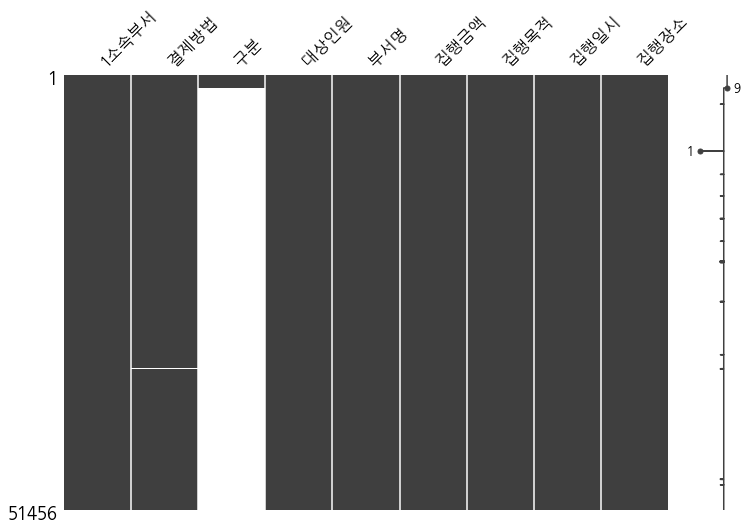

In [6]:
# missingno 패키지로 결측치를 시각화해 본다.
msno.matrix(df, figsize=(12, 8))

In [7]:
df.isnull().sum() # df.isna().sum()

1소속부서        0
결제방법       177
구분       49977
대상인원         8
부서명          2
집행금액         1
집행목적        16
집행일시         1
집행장소        35
dtype: int64

In [8]:
# 집행일시에 누락값이 있다. 해당 데이터를 확인해 보자
df[df['집행일시'].isnull()] # df[df['집행일시'].isna()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
일련번호,,,,,,,,,
해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비는 상세집행내역을 이용하세요.,서울혁신기획관,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# df[df['집행일시'].isnull()].loc['해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비는 상세집행내역을 이용하세요.']
# df[df['집행일시'].isnull()].iloc[0]
# df[df['집행일시'].isnull()].iloc[0].name
df[df['집행일시'].isnull()].index[0]

'해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비는 상세집행내역을 이용하세요.'

In [10]:
# 집행일시에 누락값이 있는 데이터를 제거한다.
print(df.shape)
df = df.drop(df[df['집행일시'].isnull()].index[0])
print(df.shape)

(51456, 9)
(51455, 9)


집행일시 열을 이용해서 '연', '월', '일', '연월', '시', '분', '요일' 파생 변수를 만든다.

In [11]:
# 판다스의 to_datetime() 함수를 사용하면 object(문자열) 타입의 데이터를 datetime 타입의 데이터로 변환할 수 있다.
df['집행일시'] = pd.to_datetime(df['집행일시'])
df.dtypes

1소속부서            object
결제방법             object
구분               object
대상인원             object
부서명              object
집행금액            float64
집행목적             object
집행일시     datetime64[ns]
집행장소             object
dtype: object

In [12]:
print(type(df['집행일시']))
print(type(df['집행일시'].dt))
print(type(df['집행일시'].dt.year))
# print(df['집행일시'].dt.year)
# 위와 같이 실행하면 dtype이 int64(8바이트)로 지정되므로 메모리를 절약하려면 astype() 함수를 사용해서 크기를 줄여준다.
print(df['집행일시'].dt.year.astype(int)) # astype(np.int32)

<class 'pandas.core.series.Series'>
<class 'pandas.core.indexes.accessors.DatetimeProperties'>
<class 'pandas.core.series.Series'>
일련번호
1     2018
2     2018
3     2018
4     2018
5     2018
      ... 
39    2016
40    2016
41    2016
42    2016
43    2016
Name: 집행일시, Length: 51455, dtype: int32


In [13]:
df['연'] = df['집행일시'].dt.year.astype(int)
df['월'] = df['집행일시'].dt.month.astype(int)
df['일'] = df['집행일시'].dt.day.astype(int)
df['연월'] = df['연'].astype(str) + '-' + df['월'].astype(str)
df['시'] = df['집행일시'].dt.hour.astype(int)
df['분'] = df['집행일시'].dt.minute.astype(int)
# 0 => 월, 1 => 화, 2 => 수, 3 => 목, 4 => 금, 5 => 토, 6 => 일
df['요일'] = df['집행일시'].dt.dayofweek.astype(int)
df

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,일,연월,시,분,요일
일련번호,,,,,,,,,,,,,,,,
1,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41:00,동신참치양재직(서초구 강남대로 213),2018,1,19,2018-1,20,41,4
2,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06:00,서울시청구내식당 ( 중구 세종대로 110),2018,1,23,2018-1,19,6,1
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13:00,한뫼촌(종로구 북촌로),2018,1,29,2018-1,20,13,0
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09:00,서울시청구내식당(중구 세종대로 110),2018,1,12,2018-1,9,9,4
5,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10:00,서울시청구내식당(중구 세종대로 110),2018,1,12,2018-1,9,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23:00,올리브네트웍스 (중구 세종대로 16길),2016,12,29,2016-12,13,23,3
40,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19:00,남도한식고운님 (중구 세종대로 82),2016,12,29,2016-12,21,19,3
41,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04:00,춘산에프앤비 (중구 태평로1가 84),2016,12,30,2016-12,13,4,4


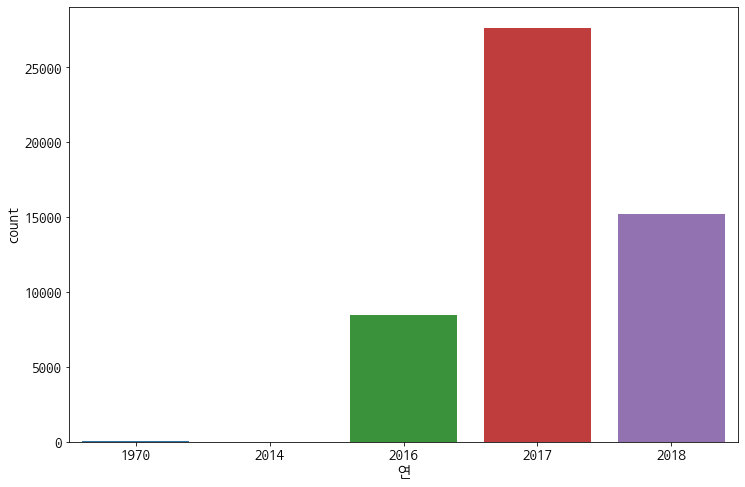

In [14]:
# plt.figure(figsize=(12, 8))
plt.rcParams['figure.figsize'] = (12, 8)
# plt.rc('font', size=20)
sns.countplot(data=df, x='연')
plt.show()

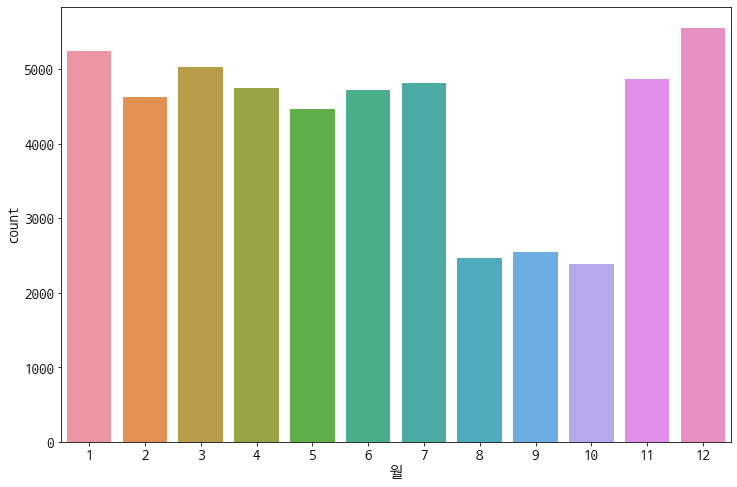

In [15]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='월')
plt.show()

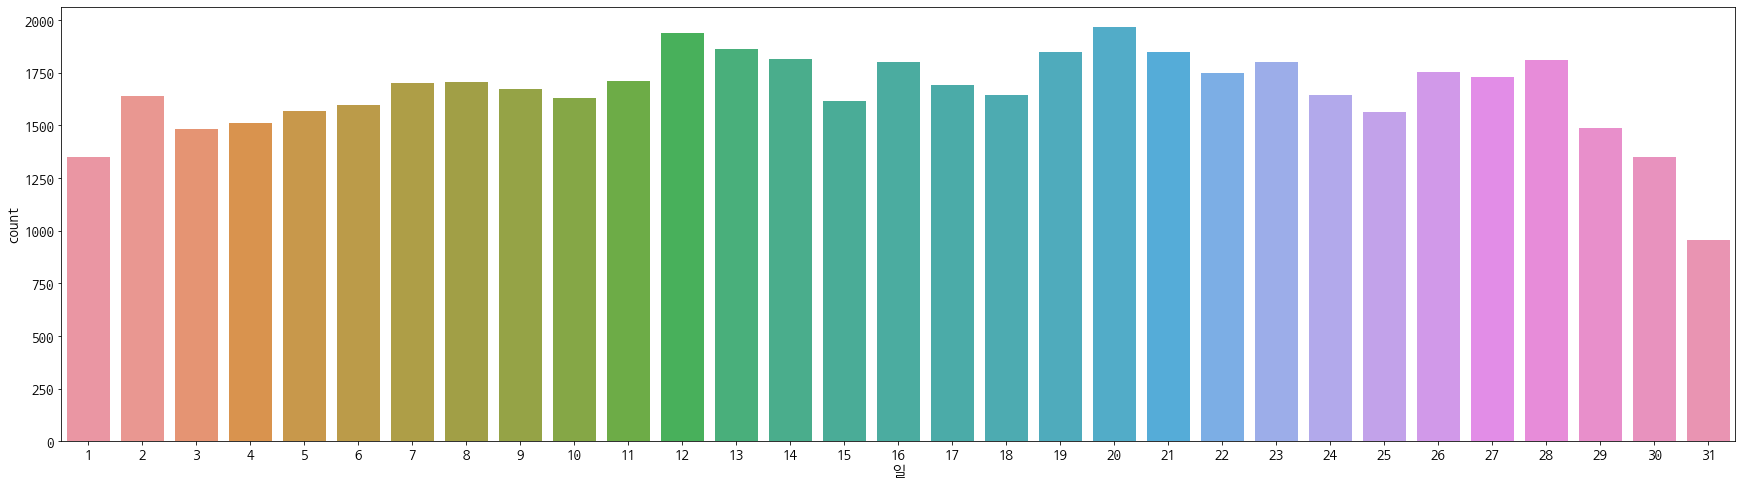

In [16]:
plt.figure(figsize=(30, 8))
sns.countplot(data=df, x='일')
plt.show()

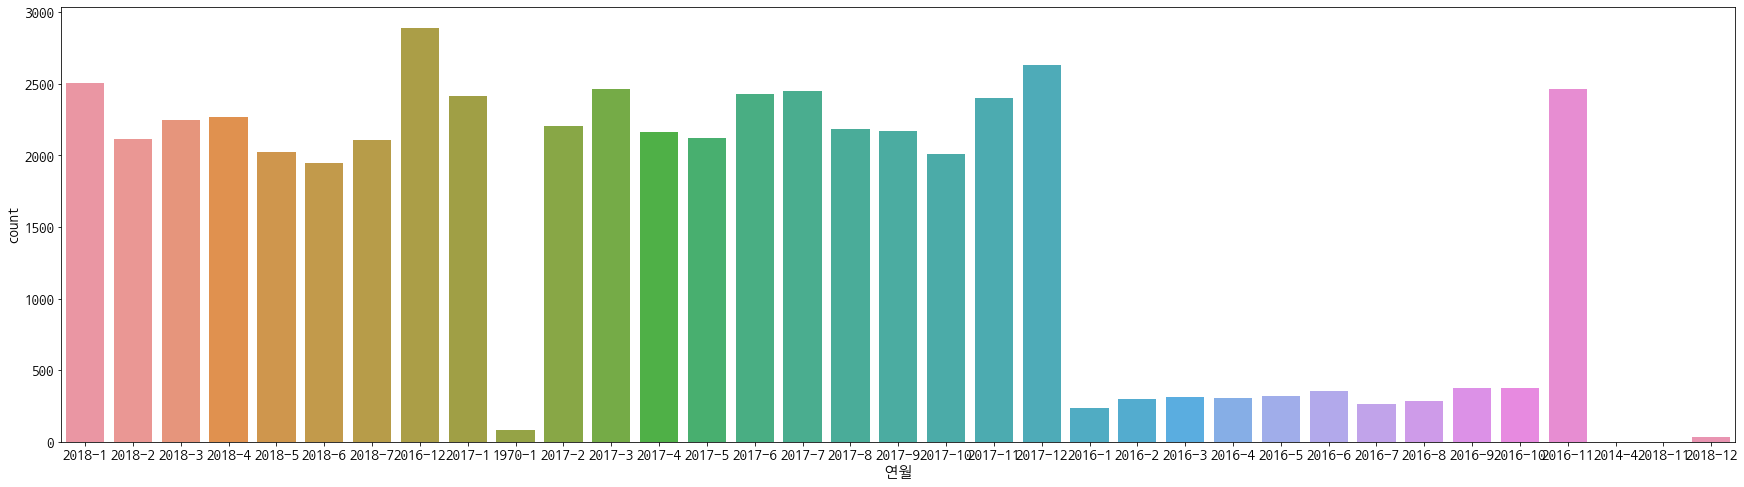

In [17]:
plt.figure(figsize=(30, 8))
sns.countplot(data=df, x='연월')
plt.show()

In [18]:
# 그래프에서 연월 순으로 보기 위해 연, 월의 오름차순으로 정렬한다.
# sort_values() 함수의 by 옵션에 정렬의 기준으로 사용할 컬럼을 지정하고 ascending 옵션으로 정렬 방식을 지정한다.
# ascending 옵션의 기본값은 True이고 오름차순으로 정렬되고, False로 지정하면 내림차순으로 정렬한다.
# df = df.sort_values(by=['연', '월'])
df.sort_values(by=['연', '월'], inplace=True) # inplace=True => 즉시적용

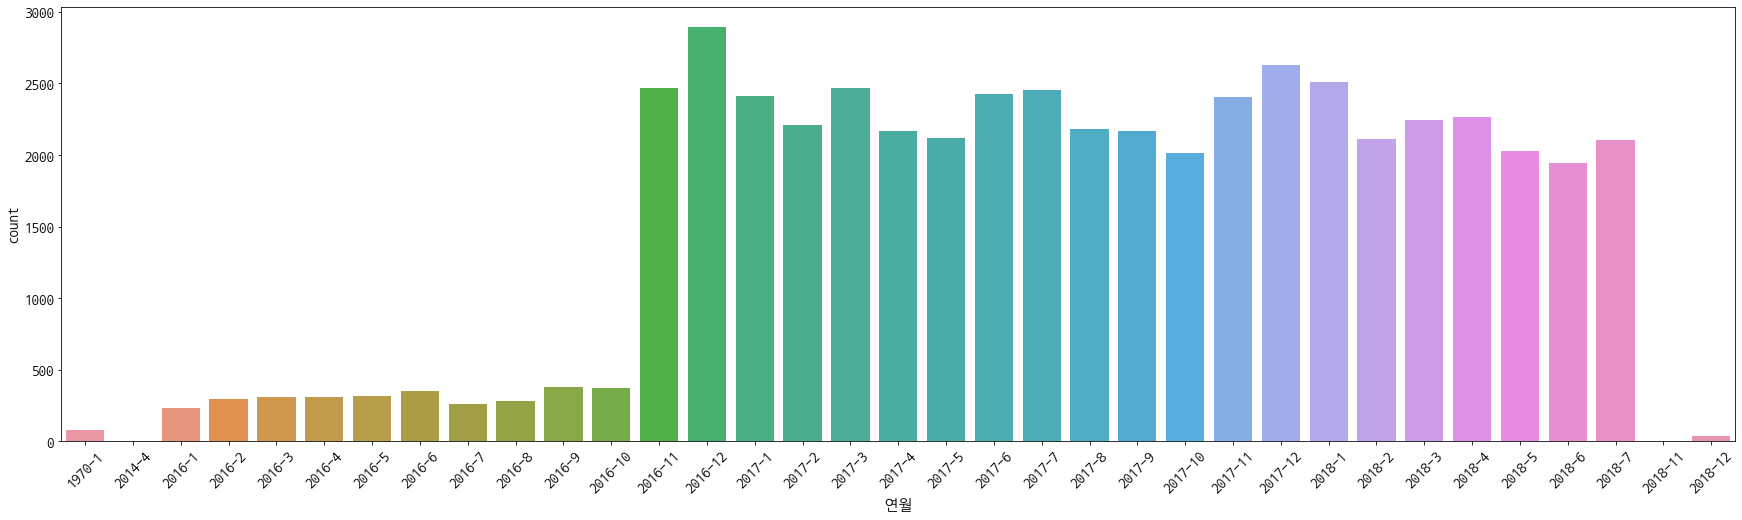

In [19]:
plt.figure(figsize=(30, 8))
# ax = sns.countplot(data=df, x='연월')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xticks(rotation=45)
sns.countplot(data=df, x='연월')
plt.show()

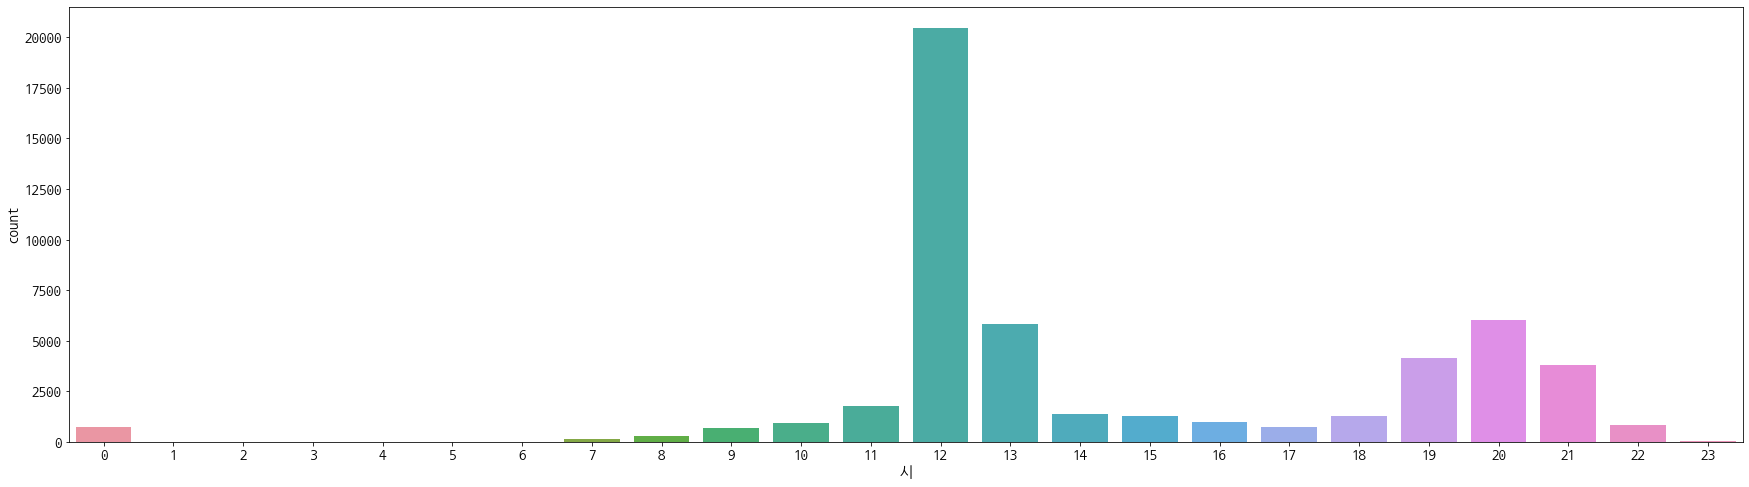

In [20]:
plt.figure(figsize=(30, 8))
sns.countplot(data=df, x='시')
plt.show()

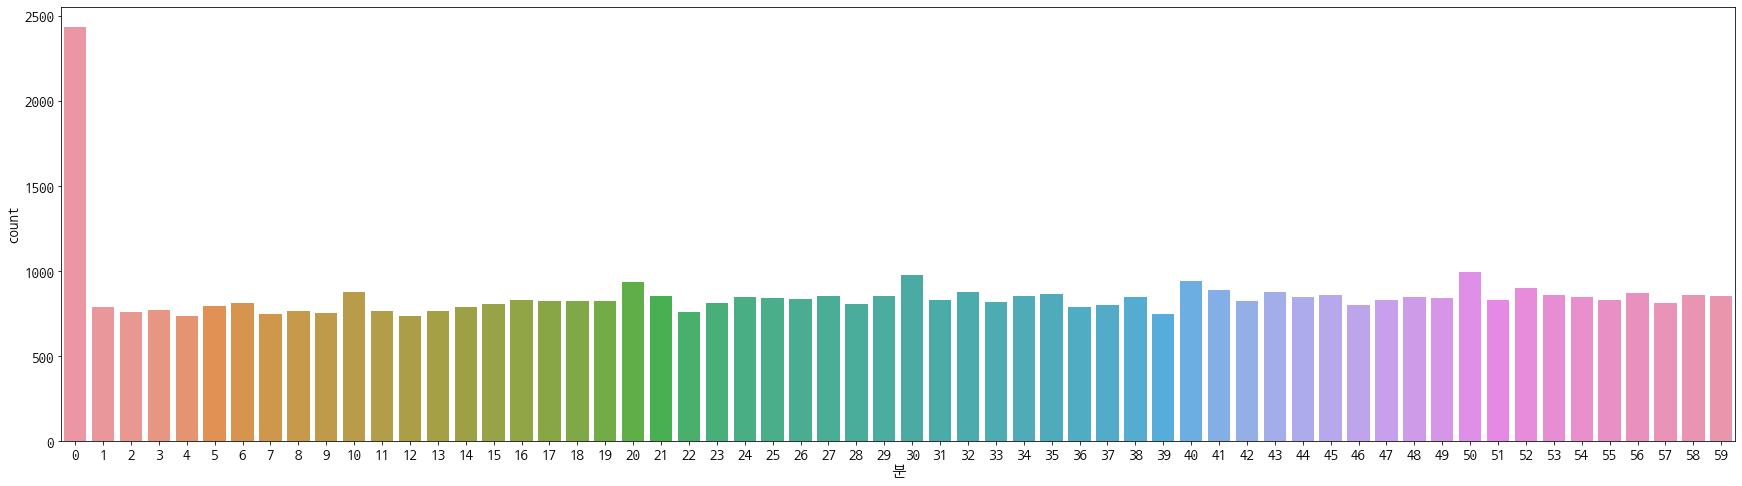

In [21]:
plt.figure(figsize=(30, 8))
sns.countplot(data=df, x='분')
plt.show()

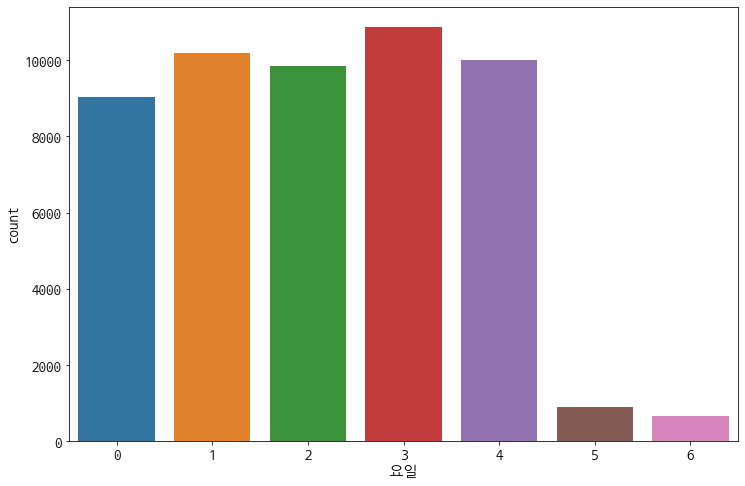

In [22]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='요일')
plt.show()

In [23]:
# 요일이 0 => 월, 1 => 화, 2 => 수, 3 => 목, 4 => 금, 5 => 토, 6 => 일와 같이 표시되므로 요일을 문자로 저장하는 열을 추가한다.
week_dict = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
print(week_dict)
print(week_dict[4])

{0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
금


In [24]:
df['요일_한글'] = df['요일'].apply(lambda week: week_dict[week])
df

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,일,연월,시,분,요일,요일_한글
일련번호,,,,,,,,,,,,,,,,,
31,서울특별시장,카드,시정 관련 간담회 등,시장 등 3명,행정국 총무과,34000.0,시정 현장방문 관련 업무협의,1970-01-01 09:00:00,뼈큰감자탕 (대구 중구 명덕로),1970,1,1,1970-1,9,0,3,목
46,서울특별시장,카드,시정 관련 간담회 등,시장 등 4명,행정국 총무과,118000.0,시정 정책 추진 자문 간담회,1970-01-01 09:00:00,서울시청구내식당,1970,1,1,1970-1,9,0,3,목
27,서울특별시장,카드,현업-우수부서 격려 등,직원 26명,행정국 총무과,130000.0,한양조성 도감 추진 노고 직원 격려,1970-01-01 09:00:00,빚은 (중구 세종대로길),1970,1,1,1970-1,9,0,3,목
37,서울특별시장,카드,시정 관련 간담회 등,시장 등 7명,행정국 총무과,151400.0,시정 일정 및 현장방문 관련 업무협의,1970-01-01 09:00:00,본도시락 (중구 소공로길),1970,1,1,1970-1,9,0,3,목
38,서울특별시장,현금,현업-우수부서 격려 등,직원 1명,행정국 총무과,1000000.0,사망직원 유족 위로금 지급,1970-01-01 09:00:00,-,1970,1,1,1970-1,9,0,3,목
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,시민건강국,카드,NaN,박*수 주무관 등 10명,보건의료정책과,50000.0,시민건강국 현안업무 추진직원 격려 다과구입비 지급,2018-12-28 15:08:00,공차(중구 을지로1길),2018,12,28,2018-12,15,8,4,금
32,시민건강국,카드,NaN,양*수 주무관 등 8명,보건의료정책과,150000.0,업무유관기관 근무자 격려 다과구입비 지급,2018-12-28 15:03:00,미스터피자(중구 무교동1),2018,12,28,2018-12,15,3,4,금
33,시민건강국,카드,NaN,시민건강국장 등 10명,보건의료정책과,173920.0,보충형 공보험 제도 검토회의 추진관련 다과 구입비 지급,2018-12-28 09:56:00,마마스(중구 무교동19),2018,12,28,2018-12,9,56,4,금


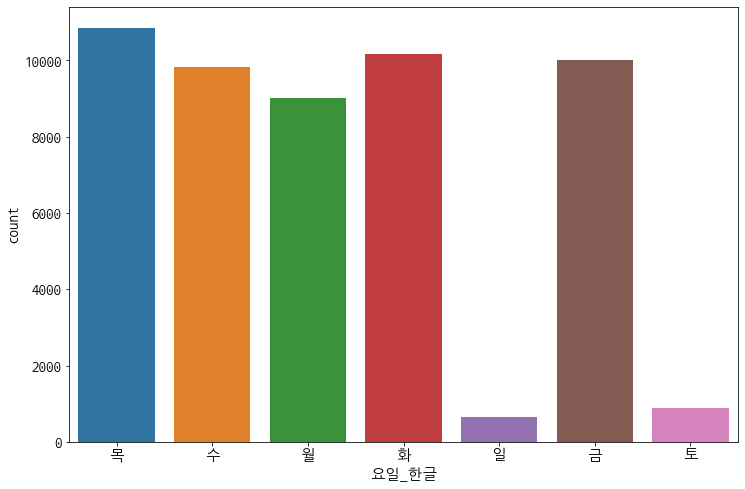

In [25]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='요일_한글')
plt.show()

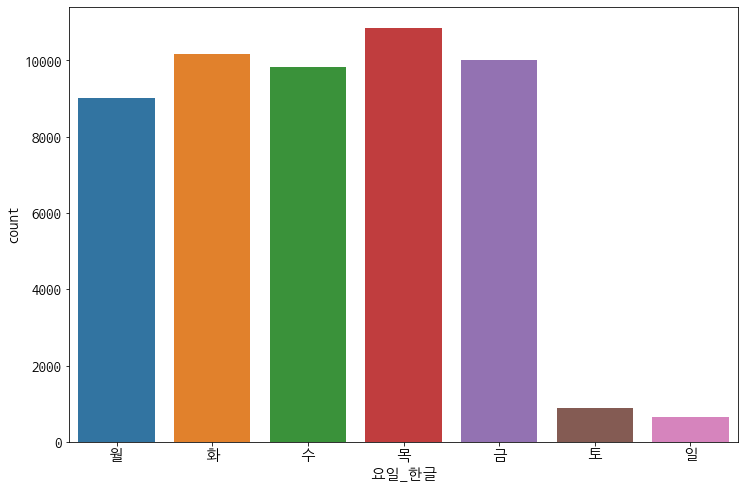

In [26]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df.sort_values(by='요일'), x='요일_한글')
plt.show()

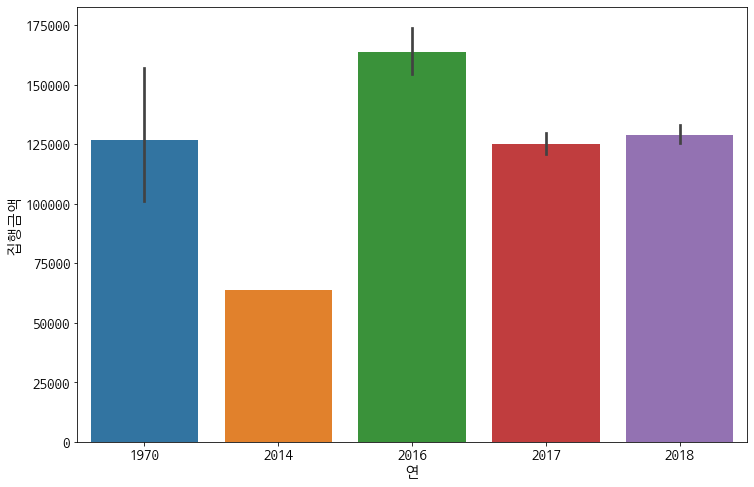

In [27]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='연', y='집행금액')
plt.show()

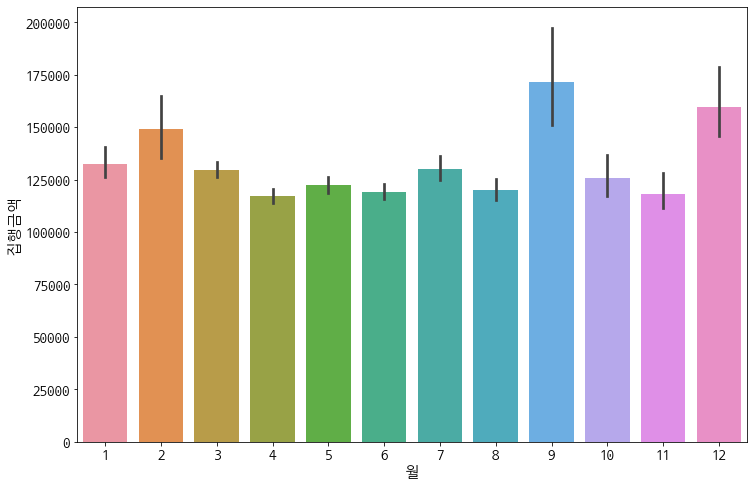

In [28]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='월', y='집행금액')
plt.show()

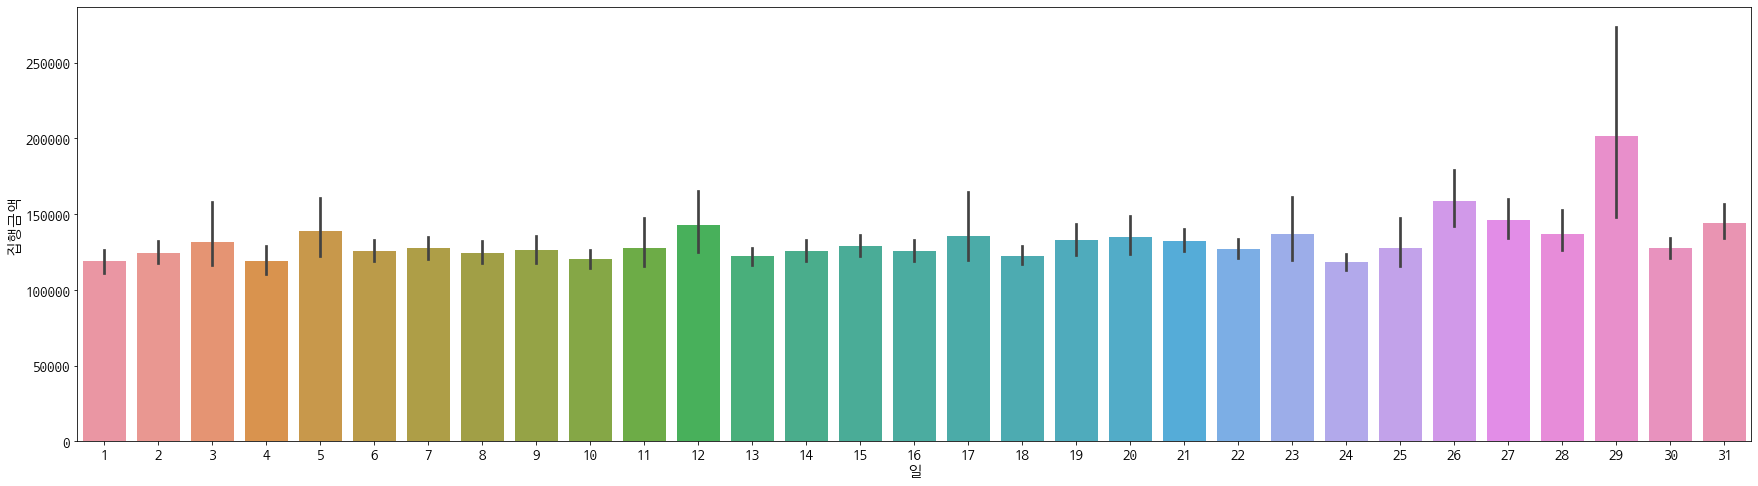

In [29]:
plt.figure(figsize=(30, 8))
sns.barplot(data=df, x='일', y='집행금액')
plt.show()

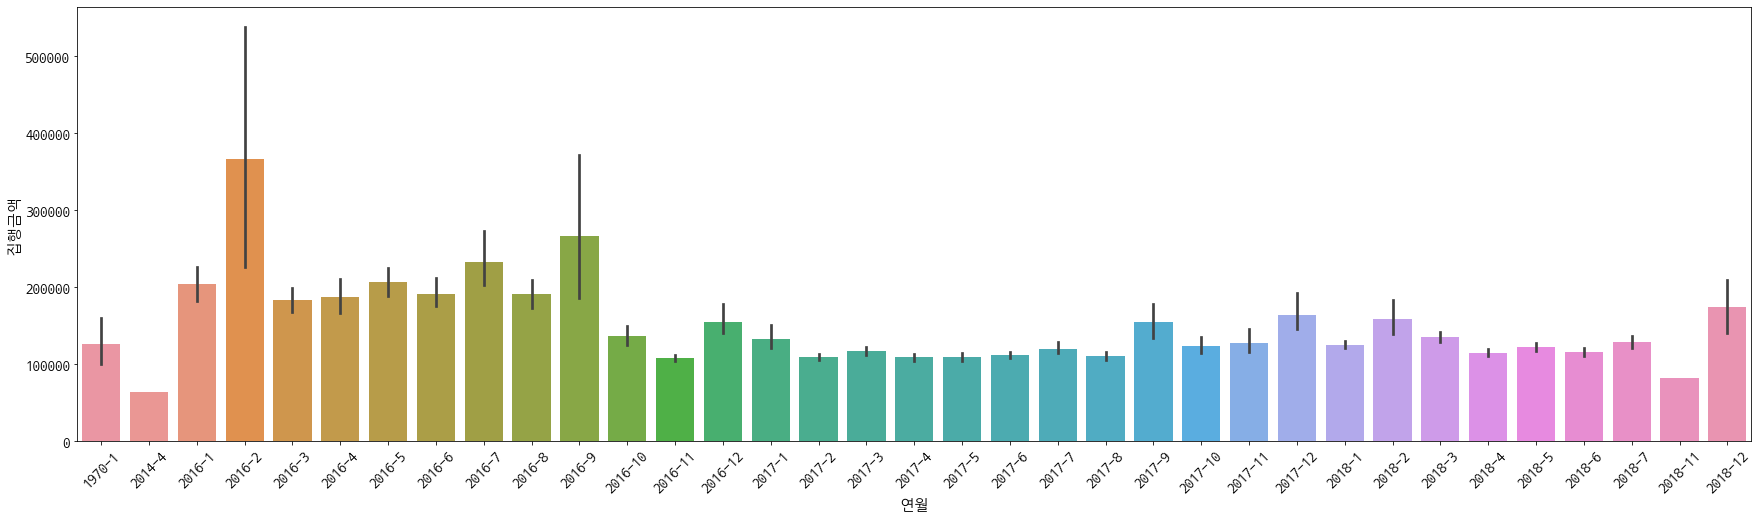

In [30]:
plt.figure(figsize=(30, 8))
plt.xticks(rotation=45)
sns.barplot(data=df, x='연월', y='집행금액')
plt.show()

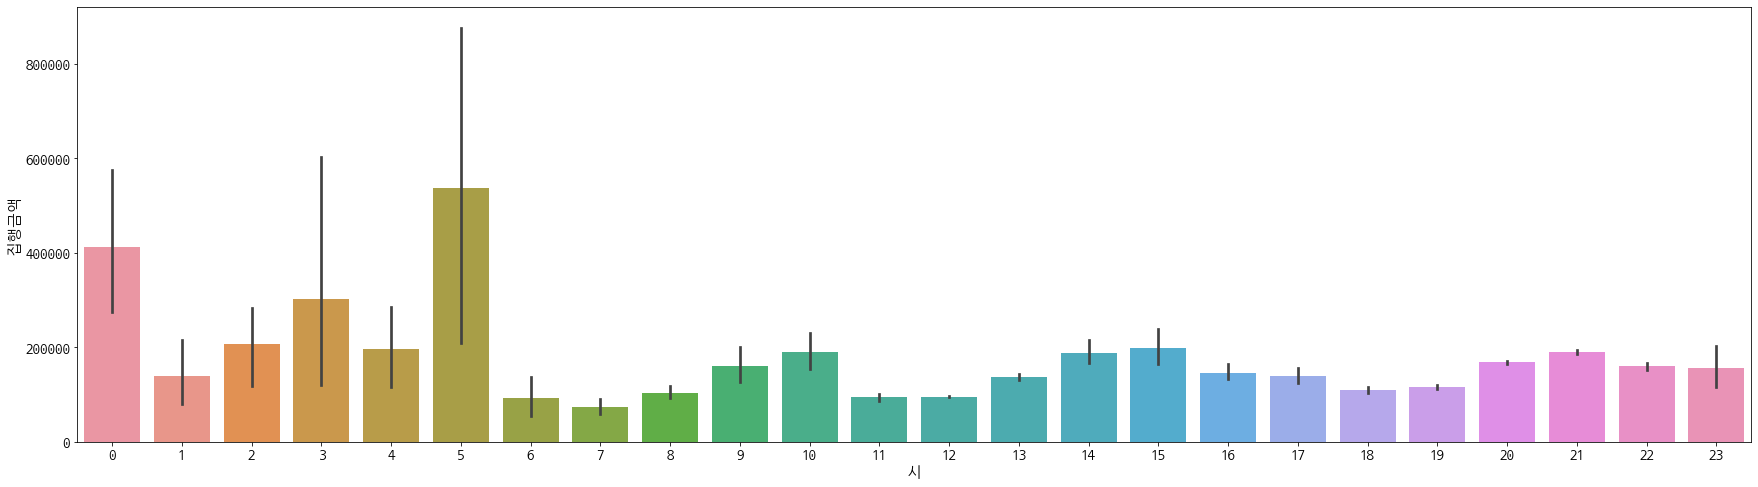

In [31]:
plt.figure(figsize=(30, 8))
sns.barplot(data=df, x='시', y='집행금액')
plt.show()

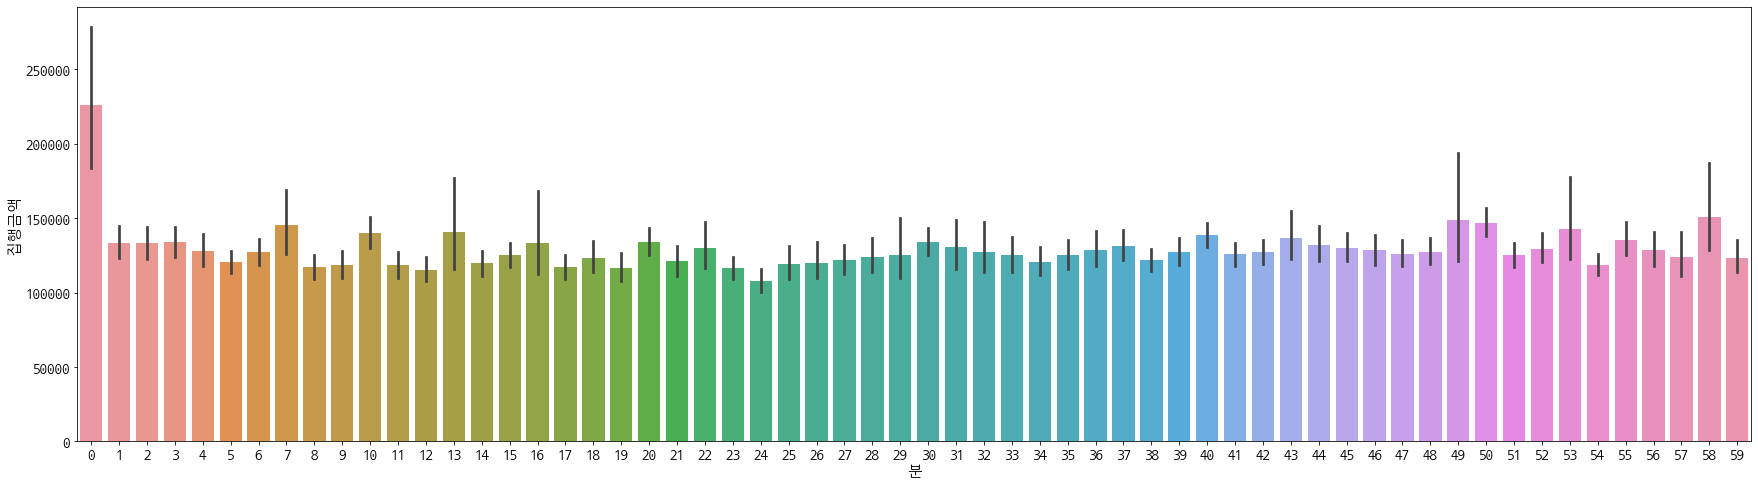

In [32]:
plt.figure(figsize=(30, 8))
sns.barplot(data=df, x='분', y='집행금액')
plt.show()

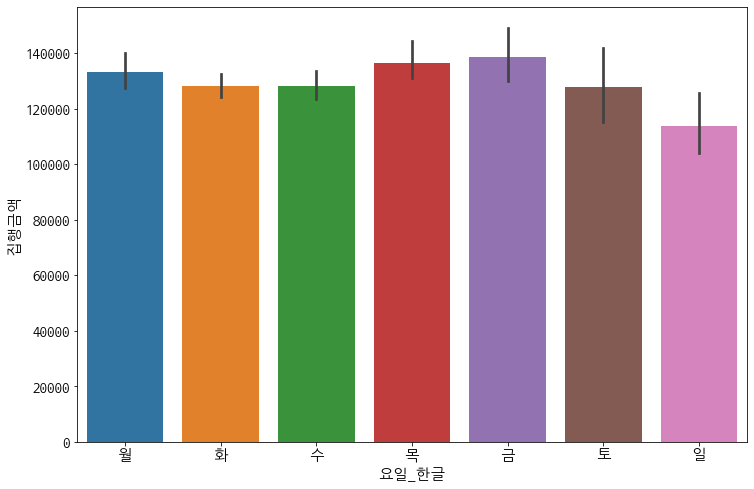

In [33]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df.sort_values(by='요일'), x='요일_한글', y='집행금액')
plt.show()

집행목적 워드클라우드

In [34]:
from wordcloud import WordCloud

In [35]:
df.head()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,일,연월,시,분,요일,요일_한글
일련번호,,,,,,,,,,,,,,,,,
31,서울특별시장,카드,시정 관련 간담회 등,시장 등 3명,행정국 총무과,34000.0,시정 현장방문 관련 업무협의,1970-01-01 09:00:00,뼈큰감자탕 (대구 중구 명덕로),1970,1,1,1970-1,9,0,3,목
46,서울특별시장,카드,시정 관련 간담회 등,시장 등 4명,행정국 총무과,118000.0,시정 정책 추진 자문 간담회,1970-01-01 09:00:00,서울시청구내식당,1970,1,1,1970-1,9,0,3,목
27,서울특별시장,카드,현업-우수부서 격려 등,직원 26명,행정국 총무과,130000.0,한양조성 도감 추진 노고 직원 격려,1970-01-01 09:00:00,빚은 (중구 세종대로길),1970,1,1,1970-1,9,0,3,목
37,서울특별시장,카드,시정 관련 간담회 등,시장 등 7명,행정국 총무과,151400.0,시정 일정 및 현장방문 관련 업무협의,1970-01-01 09:00:00,본도시락 (중구 소공로길),1970,1,1,1970-1,9,0,3,목
38,서울특별시장,현금,현업-우수부서 격려 등,직원 1명,행정국 총무과,1000000.0,사망직원 유족 위로금 지급,1970-01-01 09:00:00,-,1970,1,1,1970-1,9,0,3,목


In [36]:
# 집행목적이 누락값인 데이터를 확인한다.
df[df['집행목적'].isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,일,연월,시,분,요일,요일_한글
일련번호,,,,,,,,,,,,,,,,,
1,여성가족정책실,카드,NaN,출산장려팀장외 4명,여성가족정책실 가족담당관,30000.0,NaN,2017-02-01 12:03:00,복성각 (서울 중구 덕수궁길 7),2017,2,1,2017-2,12,3,2,수
2,여성가족정책실,카드,NaN,가족정책팀장외 3명,여성가족정책실 가족담당관,21500.0,NaN,2017-02-01 15:30:00,마포만두 (서울 중구 남대문로9길 51),2017,2,1,2017-2,15,30,2,수
3,여성가족정책실,카드,NaN,가족담당관외 5명,여성가족정책실 가족담당관,56500.0,NaN,2017-02-10 09:48:00,파스쿠찌종각알파빌딩 (서울 종로구 종로),2017,2,10,2017-2,9,48,4,금
4,여성가족정책실,카드,NaN,가족담당관외 6명,여성가족정책실 가족담당관,8000.0,NaN,2017-02-10 09:54:00,파리바게뜨 종로시그 (서울 종로구 종로),2017,2,10,2017-2,9,54,4,금
5,여성가족정책실,카드,NaN,가족담당관외 8명,여성가족정책실 가족담당관,117000.0,NaN,2017-02-10 12:14:00,（주）뚜리삼 (서울 중구 무교동),2017,2,10,2017-2,12,14,4,금
6,여성가족정책실,카드,NaN,출산장려팀장외 4명,여성가족정책실 가족담당관,87500.0,NaN,2017-02-14 12:55:00,동성각 (서울 종로구 새문안로9길 29-2),2017,2,14,2017-2,12,55,1,화
7,여성가족정책실,카드,NaN,가족담당관외 20명,여성가족정책실 가족담당관,62000.0,NaN,2017-02-21 19:37:00,갯마을낙지 (서울 중구 을지로1길 32),2017,2,21,2017-2,19,37,1,화
8,여성가족정책실,카드,NaN,아동복지권리팀장외 3명,여성가족정책실 가족담당관,70000.0,NaN,2017-02-22 16:55:00,행복한하루소바 (서울 중구 무교로),2017,2,22,2017-2,16,55,2,수
9,여성가족정책실,카드,NaN,가족정책팀장외 5명,여성가족정책실 가족담당관,125000.0,NaN,2017-02-22 21:36:00,신촌서서갈비（북창본 (서울 중구 세종대로12길 25),2017,2,22,2017-2,21,36,2,수


In [37]:
# 집행목적이 누락값인 데이터가 존재하므로 누락값을 공백으로 채워준다.
df['집행목적'] = df['집행목적'].fillna('')
df[df['집행목적'].isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,일,연월,시,분,요일,요일_한글
일련번호,,,,,,,,,,,,,,,,,


In [38]:
# 파이썬 문자열 함수 중에 특정 문자열을 문자열 사이에 삽입하는 join() 함수를 사용해서 집행목적을 연결해서 워드클라우드를 만든다.
data = ' '.join(df['집행목적'])
data[:100]

'시정 현장방문 관련 업무협의 시정 정책 추진 자문 간담회 한양조성 도감 추진 노고 직원 격려 시정 일정 및 현장방문 관련 업무협의 사망직원 유족 위로금 지급 시정 정책 추진 자문 '

In [39]:
wordcloud = WordCloud(
    font_path='C:\\WINDOWS\\Fonts\\NanumGothicCoding.ttf',
    background_color='white',
    relative_scaling=0.5
).generate(data)

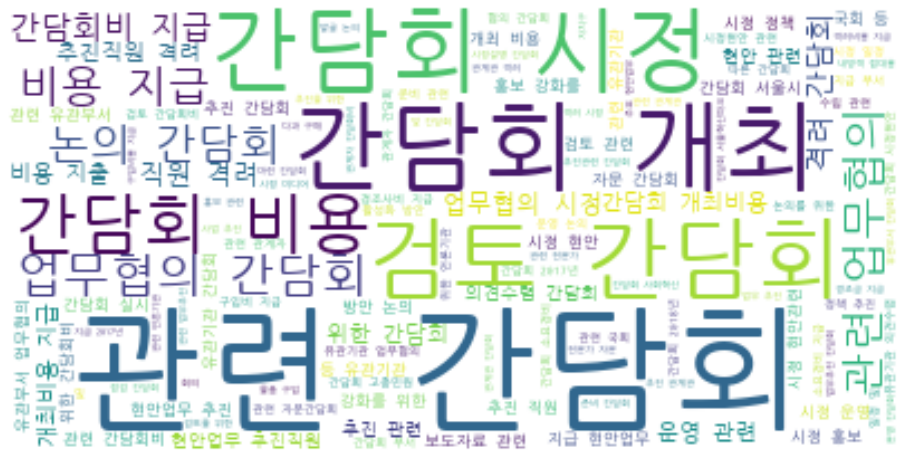

In [40]:
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

집행장소 워드 클라우드

In [41]:
# 집행장소가 누락값인 데이터를 확인한다.
df[df['집행장소'].isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,일,연월,시,분,요일,요일_한글
일련번호,,,,,,,,,,,,,,,,,
10,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,용산구도시관리국직원 경조사비 지급,2016-01-09,NaN,2016,1,9,2016-1,0,0,5,토
23,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,한강사업본부직원경조사비 지급 지급,2016-01-16,NaN,2016,1,16,2016-1,0,0,5,토
31,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,도시재생본부직원경조사비 지급,2016-01-22,NaN,2016,1,22,2016-1,0,0,4,금
32,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,강북구기획재정국직원 경조사비 지급,2016-01-23,NaN,2016,1,23,2016-1,0,0,5,토
33,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,도시기반시설본부직원 경조사비 지급,2016-01-23,NaN,2016,1,23,2016-1,0,0,5,토
14,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,물순환안전국직원경조사비 지급,2016-02-08,NaN,2016,2,8,2016-2,0,0,0,월
15,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,중부공원녹지사업소직원경조사비 지급,2016-02-08,NaN,2016,2,8,2016-2,0,0,0,월
20,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,상수도사업본부직원경조사비 지급,2016-02-14,NaN,2016,2,14,2016-2,0,0,6,일
21,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,노원구도시계획국직원 경조사비 지급,2016-02-14,NaN,2016,2,14,2016-2,0,0,6,일


In [42]:
# 집행장소가 누락값인 데이터가 존재하므로 누락값을 공백으로 채워준다.
df['집행장소'] = df['집행장소'].fillna('')
df[df['집행장소'].isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,일,연월,시,분,요일,요일_한글
일련번호,,,,,,,,,,,,,,,,,


In [43]:
df.head()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,일,연월,시,분,요일,요일_한글
일련번호,,,,,,,,,,,,,,,,,
31,서울특별시장,카드,시정 관련 간담회 등,시장 등 3명,행정국 총무과,34000.0,시정 현장방문 관련 업무협의,1970-01-01 09:00:00,뼈큰감자탕 (대구 중구 명덕로),1970,1,1,1970-1,9,0,3,목
46,서울특별시장,카드,시정 관련 간담회 등,시장 등 4명,행정국 총무과,118000.0,시정 정책 추진 자문 간담회,1970-01-01 09:00:00,서울시청구내식당,1970,1,1,1970-1,9,0,3,목
27,서울특별시장,카드,현업-우수부서 격려 등,직원 26명,행정국 총무과,130000.0,한양조성 도감 추진 노고 직원 격려,1970-01-01 09:00:00,빚은 (중구 세종대로길),1970,1,1,1970-1,9,0,3,목
37,서울특별시장,카드,시정 관련 간담회 등,시장 등 7명,행정국 총무과,151400.0,시정 일정 및 현장방문 관련 업무협의,1970-01-01 09:00:00,본도시락 (중구 소공로길),1970,1,1,1970-1,9,0,3,목
38,서울특별시장,현금,현업-우수부서 격려 등,직원 1명,행정국 총무과,1000000.0,사망직원 유족 위로금 지급,1970-01-01 09:00:00,-,1970,1,1,1970-1,9,0,3,목


In [44]:
# 집행장소에 주소가 많이 보이기때문에 주소는 전처리를 통해 제거하고 상호명이라는 컬럼을 만들어 집행장소에서 상호명을 가져온다.
# 여는 괄호 앞쪽에 있는 것을 상호명으로 한다.
# '뼈큰감자탕 (대구 중구 명덕로)'.split('(')[0].strip()
temp = df['집행장소'].apply(lambda x: x.split('(')[0].strip())
# 공백 앞쪽에 있는 것을 상호명으로 한다.
df['상호명'] = temp.apply(lambda x: x.split(' ')[0].strip())
df.head()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,일,연월,시,분,요일,요일_한글,상호명
일련번호,,,,,,,,,,,,,,,,,,
31,서울특별시장,카드,시정 관련 간담회 등,시장 등 3명,행정국 총무과,34000.0,시정 현장방문 관련 업무협의,1970-01-01 09:00:00,뼈큰감자탕 (대구 중구 명덕로),1970,1,1,1970-1,9,0,3,목,뼈큰감자탕
46,서울특별시장,카드,시정 관련 간담회 등,시장 등 4명,행정국 총무과,118000.0,시정 정책 추진 자문 간담회,1970-01-01 09:00:00,서울시청구내식당,1970,1,1,1970-1,9,0,3,목,서울시청구내식당
27,서울특별시장,카드,현업-우수부서 격려 등,직원 26명,행정국 총무과,130000.0,한양조성 도감 추진 노고 직원 격려,1970-01-01 09:00:00,빚은 (중구 세종대로길),1970,1,1,1970-1,9,0,3,목,빚은
37,서울특별시장,카드,시정 관련 간담회 등,시장 등 7명,행정국 총무과,151400.0,시정 일정 및 현장방문 관련 업무협의,1970-01-01 09:00:00,본도시락 (중구 소공로길),1970,1,1,1970-1,9,0,3,목,본도시락
38,서울특별시장,현금,현업-우수부서 격려 등,직원 1명,행정국 총무과,1000000.0,사망직원 유족 위로금 지급,1970-01-01 09:00:00,-,1970,1,1,1970-1,9,0,3,목,-


In [45]:
# 상호명이 공백인 데이터의 집행 목적을 확인한다.
df.loc[df['상호명'] == '', '집행목적'].value_counts().head()

현안업무 추진직원 격려 간담회 개최비용 지급    7
상수도사업본부직원경조사비 지급            4
도시기반시설본부직원 경조사비 지급          3
부서운영을 위한 원두커피 구입비 지급        3
부서운영 다과류 구입(120관리팀)         2
Name: 집행목적, dtype: int64

In [46]:
# 상호명이 '-'인 데이터의 집행 목적을 확인한다.
df.loc[df['상호명'] == '-', '집행목적'].value_counts().head()

소속 상근직원 경조사비 지급    82
소속직원 경조사비 지급       33
축.부의금 지급           31
소속직원 경조사비 지출       20
축의금 지급             19
Name: 집행목적, dtype: int64

In [47]:
df.loc[df['상호명'] == '대상자', '집행목적'].value_counts().head()

경조금 지급       126
경조금 지급 2건     14
경조금 지급 3건     11
경조금 2건         9
경조금 지급 5건      6
Name: 집행목적, dtype: int64

In [48]:
# 상호명이 공백, '-'인 데이터(잘못된 데이터)를 제거한다.
df_shop = df[(df['상호명'] != '') & (df['상호명'] != '-') & (df['상호명'] != '대상자')]
df_shop

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,일,연월,시,분,요일,요일_한글,상호명
일련번호,,,,,,,,,,,,,,,,,,
31,서울특별시장,카드,시정 관련 간담회 등,시장 등 3명,행정국 총무과,34000.0,시정 현장방문 관련 업무협의,1970-01-01 09:00:00,뼈큰감자탕 (대구 중구 명덕로),1970,1,1,1970-1,9,0,3,목,뼈큰감자탕
46,서울특별시장,카드,시정 관련 간담회 등,시장 등 4명,행정국 총무과,118000.0,시정 정책 추진 자문 간담회,1970-01-01 09:00:00,서울시청구내식당,1970,1,1,1970-1,9,0,3,목,서울시청구내식당
27,서울특별시장,카드,현업-우수부서 격려 등,직원 26명,행정국 총무과,130000.0,한양조성 도감 추진 노고 직원 격려,1970-01-01 09:00:00,빚은 (중구 세종대로길),1970,1,1,1970-1,9,0,3,목,빚은
37,서울특별시장,카드,시정 관련 간담회 등,시장 등 7명,행정국 총무과,151400.0,시정 일정 및 현장방문 관련 업무협의,1970-01-01 09:00:00,본도시락 (중구 소공로길),1970,1,1,1970-1,9,0,3,목,본도시락
39,서울특별시장,카드,시정 관련 간담회 등,시장 등 9명,행정국 총무과,250000.0,시정 정책 추진 자문 간담회,1970-01-01 09:00:00,참춫골 (중구 무교로길),1970,1,1,1970-1,9,0,3,목,참춫골
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,시민건강국,카드,NaN,박*수 주무관 등 10명,보건의료정책과,50000.0,시민건강국 현안업무 추진직원 격려 다과구입비 지급,2018-12-28 15:08:00,공차(중구 을지로1길),2018,12,28,2018-12,15,8,4,금,공차
32,시민건강국,카드,NaN,양*수 주무관 등 8명,보건의료정책과,150000.0,업무유관기관 근무자 격려 다과구입비 지급,2018-12-28 15:03:00,미스터피자(중구 무교동1),2018,12,28,2018-12,15,3,4,금,미스터피자
33,시민건강국,카드,NaN,시민건강국장 등 10명,보건의료정책과,173920.0,보충형 공보험 제도 검토회의 추진관련 다과 구입비 지급,2018-12-28 09:56:00,마마스(중구 무교동19),2018,12,28,2018-12,9,56,4,금,마마스


In [49]:
df_shop['상호명'].value_counts().head(30)

참숯골           802
우도일식          758
서울시청매점        718
구이구이          658
곰국시집          517
서울시청구내식당      430
동해일식          405
무교소호정         390
동원참치          384
동해수산          356
스타벅스          347
바닷가작은부엌       325
한가람           319
라칸티나          318
더테이블한정식       305
파리바게뜨         287
제일가든          286
어미가           281
열빈            280
삼우정           280
오리마당          266
월향            258
복성각           257
창고43          248
남포면옥          235
무교동낙지         230
포메인           229
마마스           223
（주）바닷가작은부엌    222
서라벌           209
Name: 상호명, dtype: int64

In [50]:
df_shop.loc[df_shop['상호명'] == '（주）바닷가작은부엌', '상호명'] = '바닷가작은부엌'
df_shop.loc[df_shop['상호명'] == '（주）뚜리삼', '상호명'] = '뚜리삼'

df_shop.loc[df_shop['상호명'] == '시청매점', '상호명'] = '서울시청매점'
df_shop.loc[df_shop['상호명'] == '서을시청매점', '상호명'] = '서울시청매점'
df_shop.loc[df_shop['상호명'] == '서우시청매점', '상호명'] = '서울시청매점'
df_shop.loc[df_shop['상호명'] == '서울시청매점,', '상호명'] = '서울시청매점'
df_shop.loc[df_shop['상호명'] == '시울시청매점,', '상호명'] = '서울시청매점'
df_shop.loc[df_shop['상호명'] == '시울시청매점서울', '상호명'] = '서울시청매점'
df_shop.loc[df_shop['상호명'] == '시울시청매점,', '상호명'] = '서울시청매점'
df_shop.loc[df_shop['상호명'] == '시울시청매점,', '상호명'] = '서울시청매점'

df_shop.loc[df_shop['상호명'] == '서울시천신매점', '상호명'] = '서울시청신매점'
df_shop.loc[df_shop['상호명'] == '시울시청신매점', '상호명'] = '서울시청신매점'
df_shop.loc[df_shop['상호명'] == '서울신청신매점', '상호명'] = '서울시청신매점'
df_shop.loc[df_shop['상호명'] == '서울시청신매점서울', '상호명'] = '서울시청신매점'
df_shop.loc[df_shop['상호명'] == '시청신매점', '상호명'] = '서울시청신매점'

In [51]:
# df_shop.loc[df_shop['상호명'] == '서울시청매점', '상호명'] = '매점'

In [52]:
df_shop['상호명'].value_counts().head(30)

서울시청매점      809
참숯골         802
우도일식        758
구이구이        658
바닷가작은부엌     547
곰국시집        517
서울시청구내식당    430
동해일식        405
무교소호정       390
동원참치        384
동해수산        356
스타벅스        347
한가람         319
라칸티나        318
더테이블한정식     305
파리바게뜨       287
제일가든        286
어미가         281
삼우정         280
열빈          280
뚜리삼         269
오리마당        266
월향          258
복성각         257
창고43        248
남포면옥        235
무교동낙지       230
포메인         229
마마스         223
서라벌         209
Name: 상호명, dtype: int64

In [53]:
top_100 = df_shop['상호명'].value_counts().head(100)
top_100 = pd.DataFrame(top_100).reset_index()
top_100.columns = ['상호명', '횟수']
top_100

,상호명,횟수
0,서울시청매점,809
1,참숯골,802
2,우도일식,758
3,구이구이,658
4,바닷가작은부엌,547
...,...,...
95,삼원,88
96,달개비,88
97,제주본가,88
98,대가일식,87


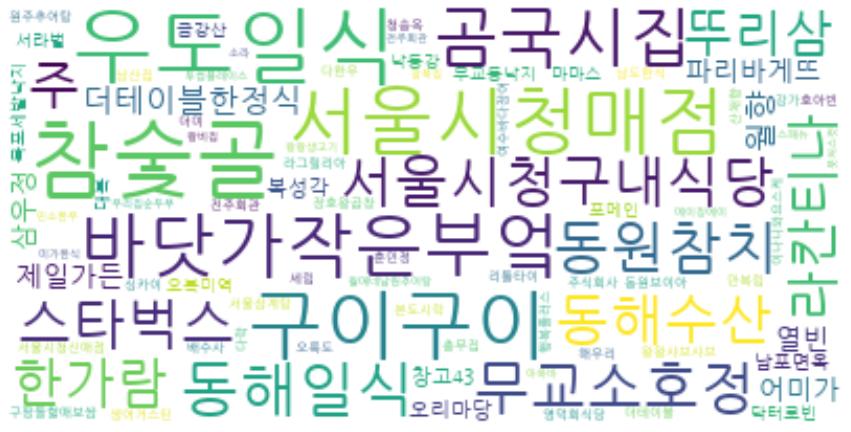

In [61]:
wordcloud = WordCloud(
    font_path='C:\\WINDOWS\\Fonts\\NanumGothicCoding.ttf',
    background_color='white',
    max_font_size=40,
    max_words=100,
    relative_scaling=0.5
).generate(' '.join(df_shop['상호명']))

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()